#Imports

In [34]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import warnings

#Data

In [2]:
num_classes = 10 # 0 1 2 3 4 5 6 7 8 9
input_shape = (28, 28, 1) #width 28, height 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Plot

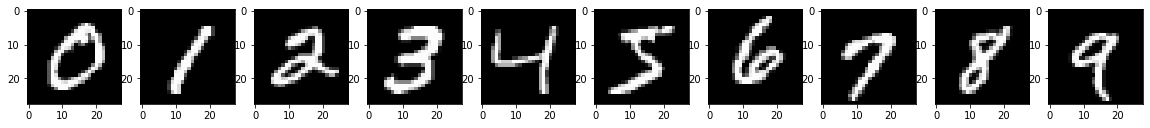

In [5]:
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')

#Prepare Data

In [6]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [10]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


#Model

In [12]:
model = keras.Sequential(
    [
      Conv2D(75, kernel_size=(3, 3), padding='same', activation="relu", input_shape=input_shape),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Conv2D(50, kernel_size=(3, 3), padding ='same', activation="relu"),
      Dropout(0.2),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Conv2D(25, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),


      Flatten(),
      Dense(256, activation="relu"),
      Dropout(0.3),
     
      Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [13]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)

Epoch 1/15
329/329 [==============================] - 47s 142ms/step - loss: 0.2047 - accuracy: 0.9346 - val_loss: 1.3156 - val_accuracy: 0.4115
Epoch 2/15
329/329 [==============================] - 46s 139ms/step - loss: 0.0620 - accuracy: 0.9802 - val_loss: 0.0652 - val_accuracy: 0.9811
Epoch 3/15
329/329 [==============================] - 45s 137ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0389 - val_accuracy: 0.9882
Epoch 4/15
329/329 [==============================] - 45s 137ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0574 - val_accuracy: 0.9829
Epoch 5/15
329/329 [==============================] - 44s 135ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 6/15
329/329 [==============================] - 47s 142ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0494 - val_accuracy: 0.9857
Epoch 7/15
329/329 [==============================] - 46s 140ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0335 - val_ac

#Evaluate

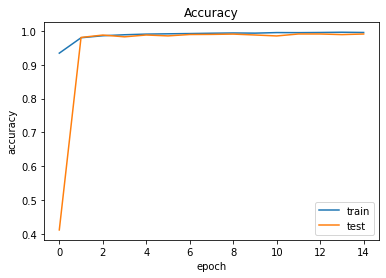

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

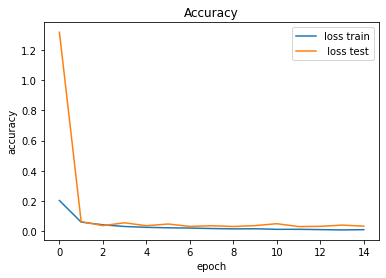

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['loss train',' loss test'])

plt.show()

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0257900170981884
Test accuracy: 0.9927999973297119


#Metrics

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [18]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
predict = model.predict(x_test)

In [20]:
predict

array([[1.4501975e-12, 1.7645700e-08, 7.8001167e-10, ..., 9.9999988e-01,
        2.6594070e-12, 1.2523940e-07],
       [1.9485535e-08, 6.7966295e-09, 1.0000000e+00, ..., 6.4651645e-11,
        8.4514203e-15, 1.5565385e-12],
       [3.4016061e-11, 9.9999869e-01, 2.7844701e-12, ..., 2.8491543e-08,
        2.3557923e-11, 1.9455038e-10],
       ...,
       [3.6113229e-20, 6.8361287e-16, 1.2782176e-18, ..., 3.4566493e-14,
        8.6209048e-15, 5.2548330e-13],
       [5.2947589e-15, 8.7248126e-17, 9.1848067e-18, ..., 2.3254765e-16,
        1.5969880e-10, 1.2943362e-14],
       [2.8857080e-08, 2.0283739e-13, 1.7022998e-12, ..., 3.0319867e-16,
        1.1291680e-11, 9.0965072e-13]], dtype=float32)

In [21]:
predict_classes = np.argmax(predict, axis=1)

In [22]:
predict_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

##Accuracy

In [23]:
print(accuracy_score(np.argmax(y_test, axis=1), predict_classes))

0.9928


##Confusion Matrix

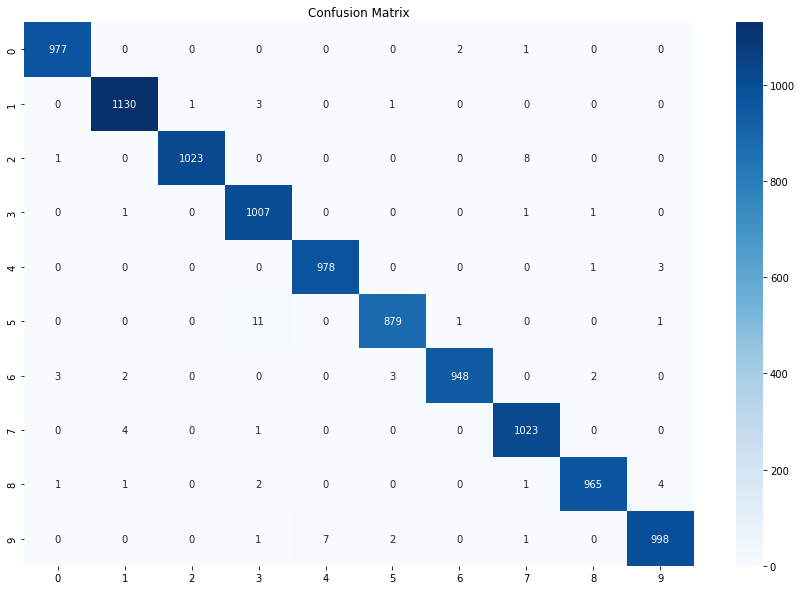

In [24]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), predict_classes), annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_title('Confusion Matrix');

# Save

In [33]:
model.save('model.h5', save_format='h5')

# Submission

In [35]:
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')

In [36]:
x_test_sub = test.values.reshape(-1, 28,28,1)
x_test_sub = x_test_sub / 255
x_test_sub.shape

(28000, 28, 28, 1)

In [41]:
predict_sub = model.predict(x_test_sub)
predict_sub = np.argmax(predict_sub, -1)

In [43]:
predict_sub[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3], dtype=int64)

In [44]:
sample_submission['Label'] = predict_sub
sample_submission.to_csv('submission.csv', index=False)